0.9920793013393681


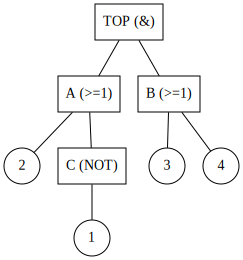

In [1]:
import graphviz as gv
class ANDNODE:
    def __init__(self,name):
        self.name=name
        self.nodes=[]
    def add(self,node):
        if len(self.nodes)==2:
            return
        else:
            self.nodes.append(node)
            return
    def availability(self):
        unavailabilityProduct = 1
        for e in self.nodes:
            unavailabilityProduct *= (1-e.availability())
        return 1 - unavailabilityProduct

class ORNODE:
    def __init__(self,name):
        self.name=name
        self.nodes=[]
    def add(self,node):
        if len(self.nodes)==2:
            return
        else:
            self.nodes.append(node)
            return
    def availability(self):
        availabilityProduct=1
        for e in self.nodes:
            availabilityProduct *= e.availability()
        return availabilityProduct

class NOTNODE:
    def __init__(self,name):
        self.name=name
        self.nodes=[]
    def add(self,node):
        #Negation hat nur einen Eingang
        if len(self.nodes)==1:
            return
        else:
            self.nodes.append(node)
            return
    def availability(self):
        return 1-self.nodes[0].availability()

class EVENT:
    def __init__(self,name,la,mu):
        self.name=name
        self.la=la
        self.mu=mu
        self.nodes=[]
    #da Event = Standard-Eingang, benötige ich keine add-Funktion und keine nodes-Liste
    def availability(self):
        return self.mu/(self.la+self.mu)

def zeichnen(liste):
    g=gv.Graph()
    for e in liste:
        if str(type(e))=="<class '__main__.EVENT'>":
            g.node(e.name,shape="circle")
        else:
            g.node(e.name,shape="rectangle")
        for child in e.nodes:
            g.edge(e.name,child.name)
    return g

TOP = ANDNODE('TOP (&)')
A = ORNODE('A (>=1)')
B = ORNODE('B (>=1)')
C = NOTNODE('C (NOT)')

E1 = EVENT('1',1/1000,1/4)
E2 = EVENT('2',1/1000,1/4)
E3 = EVENT('3',1/1000,1/4)
E4 = EVENT('4',1/1000,1/4)

C.add(E1)
A.add(E2)
A.add(C)
B.add(E3)
B.add(E4)
TOP.add(A)
TOP.add(B)

avail = TOP.availability()

print(avail)

zeichnen([E1,E2,E3,E4,A,B,C,TOP])